### Questions/Insights
* Can I explain PCA in my own words - Maria
* How are SVMs tied to PCA - John K
    * saw it in a lab...didn't know what it was doing
* What makes PCA valuable as a practice?
* Is it similar to feature engineering...No

# PCA - Principal Component Analysis
* Principal - the main/important N features
* Components - eigen vectors dimensions coming from features...kinda
* Analysis - cause math and stuff

# Scenario A: 
Let's say we're working with text data and have a BOW model.  Every word gets a column, really really wide data. 400000 columns of data. This is tough...and we have the curse of dimensionality...lots of features in space. PCA is used to bring the dimensions down to something that is more manageable. 
* Modeling that suffers from the curse of dimensionality
    * Logistic Regression
    * KNN - K Nearest Neighbors
    * SVMs
    * Linear classifiers


* Modeling that are indifferent
    * Tree based modeling
    * Random Forest doesn't struggle with high dimensions
    
    
    
# Scenario B: 
You have a model that works in high dimensional space, but you want to view the clusters that are being created. PCA is used to bring those dimensions down to 2/3 dimensional representations.

# Why PCA?
* Preserves the correlation of your space as best as possible
* Also leverages Eigen Decomposition

# What is PCA?

### What it's not.
* Separate our features to visualize data? --- No this isn't PCA
* Reducing dimensions of the subspace of data into smaller subspace
* Isn't this what we were doing before but for larger data? 
    * No, this is not like before
    * That is feature selection
* How we select features then make a model with forward/backward selection?


### What it is.
* Reducing the columns of your data, but you're losing the features you had. 
* Example: 
    * original features: 
        * \[num_bedrooms, waterfront, sqft_living, sqft_basement, sqft_lot, num_bathrooms, floors, views, zipcode, lon, lat\]
    * let's say I want to reduce this down to 2 dimensions so I can view clusters of homes
        * $col1 = A1*numbedrooms + A2*waterfront + A3*sqftliving + A4*sqftbasement + ...$
        * col1 becomes a linear combination of the features
        * col2 becomes a linear combination of the features

# Let's go through the algorithm of PCA

Step 1: You have a dataset, `df`, `df.shape=(1000, 25)`
Step 2: Next you have to calculate the correlation matrix
    * You need the correlation matrix for 2 reasons:
        a. Because it's a square matrix and you literally cannot do eigendecomposition
        b. Because the eigen vectors (components) will be the vectors that capture the correlation 
Step 3: Calculates all eigen vectors for your correlations pace
Step 4: Gets the N most important vectors

In [9]:
import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.decomposition import PCA

In [2]:
d = load_diabetes()

In [10]:
df = pd.DataFrame(d.data, columns=d.feature_names)
# df['target'] = d.target
# df.head()

In [11]:
df.shape # let's reduce this down to 2 dimensions

(442, 10)

In [12]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [13]:
df.corr().shape

(10, 10)

In [14]:
pca = PCA(n_components=2)

In [15]:
new_vecs = pca.fit_transform(df.values)

In [16]:
new_vecs

array([[ 2.79306207e-02, -9.26011612e-02],
       [-1.34686052e-01,  6.52634060e-02],
       [ 1.29447396e-02, -7.77641691e-02],
       [ 2.34543980e-03,  1.81819367e-02],
       [-3.59806910e-02,  3.86213572e-02],
       [-1.88660280e-01, -1.81251413e-02],
       [-9.48347610e-02, -3.83155499e-02],
       [ 9.87389258e-02,  8.69453424e-02],
       [ 2.86833351e-02, -4.19169143e-02],
       [-1.00910711e-02, -2.34450670e-02],
       [-1.83419418e-01, -7.28738089e-02],
       [ 1.88796730e-02, -3.00873701e-02],
       [-7.59323171e-02,  4.66838722e-02],
       [ 1.51473512e-02, -3.09692487e-02],
       [-8.01694940e-02,  8.64707740e-02],
       [ 1.40488092e-01,  4.51897240e-02],
       [ 7.58600302e-03,  4.33946961e-02],
       [ 1.08839198e-01, -7.06819254e-03],
       [-5.49947993e-02, -2.03725705e-02],
       [-8.42651351e-02,  4.41806793e-02],
       [-9.55955468e-02, -1.37941404e-02],
       [-9.18719735e-02, -3.95423697e-02],
       [-7.97268029e-02,  3.42316116e-02],
       [ 1.

In [17]:
new_vecs.shape, df.shape

((442, 2), (442, 10))

In [18]:
import matplotlib.pyplot as plt

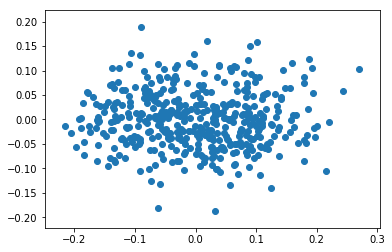

In [19]:
plt.scatter(new_vecs[:, 0], new_vecs[:, 1])
plt.show()

### Objectives
- Define Eigenvalues and Eigenvectors
- Describe how these are used in PCA
- Apply PCA to reduce dimensions of data

### Outline
- Questions
- Explain eigenvalues and eigenvectors and why they're awesome
- Apply eigen decomposition to the correlation matrix and discuss how it's used in PCA
- Apply PCA to some dataset that we create using sklearn

In [15]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

### Eigenvalues and Eigenvectors are only applied on square matrices

In [2]:
A = np.random.randint(10, 20, size=(3, 3))
A 

array([[16, 13, 17],
       [14, 16, 19],
       [12, 16, 17]])

### Eigen Properties
- Eigen Values multiply to the determinent of A
- Eigen Values add to the trace of matrix A (trace = sum of diagonals)
- Eigen Vectors are orthonormal *always normal not always orthogonal*
    - what is 'orthonormality'?
        - orthogonal -> perpendicular, the angle is 90 degrees
        - normal -> vector length = 1

In [4]:
evals, evecs = np.linalg.eig(A)
evals, evecs

(array([46.59404279,  3.08723726, -0.68128005]),
 array([[-0.56733781, -0.85134788, -0.28192077],
        [-0.60593555,  0.22744997, -0.60839181],
        [-0.55764677,  0.47272963,  0.74187605]]))

In [5]:
evals_diag = np.diag(evals)
evals_diag

array([[46.59404279,  0.        ,  0.        ],
       [ 0.        ,  3.08723726,  0.        ],
       [ 0.        ,  0.        , -0.68128005]])

In [6]:
evals, evecs

(array([46.59404279,  3.08723726, -0.68128005]),
 array([[-0.56733781, -0.85134788, -0.28192077],
        [-0.60593555,  0.22744997, -0.60839181],
        [-0.55764677,  0.47272963,  0.74187605]]))

### Eigenvalues

In [7]:
np.prod(evals), np.linalg.det(A)

(-98.00000000000033, -98.00000000000004)

In [8]:
np.sum(evals), np.trace(A)

(49.000000000000014, 49)

In [9]:
evecs_inv = np.linalg.inv(evecs)

In [10]:
evals, evecs, evecs_inv

(array([46.59404279,  3.08723726, -0.68128005]),
 array([[-0.56733781, -0.85134788, -0.28192077],
        [-0.60593555,  0.22744997, -0.60839181],
        [-0.55764677,  0.47272963,  0.74187605]]),
 array([[-0.5153841 , -0.56279276, -0.65738204],
        [-0.89084741,  0.65289909,  0.19689283],
        [ 0.1802561 , -0.8390678 ,  0.72833724]]))

In [14]:
v1 = evecs.T[0]
v2 = evecs.T[1]

In [18]:
v1.dot(v2) # not orthogonal

0.08156567299094766

### Eigenvectors if A is symmetrical

In [22]:
### Let's make a symmetrical matrix
# A Matrix M is symmetrical iff M.T == M
A  = np.random.randint(10, 100, size=(5000, 3))
A_sym = np.cov(A.T) 
A_sym

array([[685.36053115,  15.74046305,  19.44167121],
       [ 15.74046305, 682.13611326,   8.34016315],
       [ 19.44167121,   8.34016315, 681.98656867]])

In [23]:
evals, evecs = np.linalg.eig(A_sym)
evals, evecs

(array([712.95964765, 662.52013564, 674.0034298 ]),
 array([[ 0.67116995,  0.73428336,  0.10177836],
        [ 0.49262623, -0.33920074, -0.80141266],
        [ 0.55394069, -0.58802279,  0.58938859]]))

In [24]:
### normal -> all eigenvectors are normal, always
# A vector v is normal iff length of v is 1
np.sqrt(np.sum(evecs[:, 0]**2))

1.0

In [25]:
### because A_sym is symmetrical the vectors are also orthogonal
# vectors a and b are orthogonal iff the angle between a and b is 90 degree (dot product = 0)

np.dot(evecs[:, 0], evecs[:, 1])

-2.7755575615628914e-17

In [28]:
## if A*B = I -> A, B are inverses
## evecs.T = evecs.inv()
np.round(evecs.dot(evecs.T), 2)

array([[ 1., -0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [29]:
A_sym

array([[685.36053115,  15.74046305,  19.44167121],
       [ 15.74046305, 682.13611326,   8.34016315],
       [ 19.44167121,   8.34016315, 681.98656867]])

In [30]:
# Q L Q^T
evecs.dot(np.diag(evals)).dot(evecs.T)

array([[685.36053115,  15.74046305,  19.44167121],
       [ 15.74046305, 682.13611326,   8.34016315],
       [ 19.44167121,   8.34016315, 681.98656867]])

In [31]:
### eigenvecs and vals redescribe your space 
### if your space is symmetrical, then the eigenvecs are a basis
### so...why is this important for dimensionality reduction?

## PCA
1. Calculate the covariance matrix of your data, C -> Symmetrical
2. Calculate the eigenvecs and eigenvalues of covariance matrix
    - eigenvectors are normal and orthogonal
3. Project our data onto the vectors that most describe the correlation

* feature engineering (kinda) on the variance

## Pros
- Reducing dimensionality gives fast processing time
- Get more accurate results, at times
- Don't have to drop features
- Visualize your data



## Cons
- lose ALL interpretability
- To reduce could be computationally expensive
- lose relationships

### Decomposition for non square matrix
- SVD (Singular Value Decomposition)
- Linear Discriminant Analysis
- Reduces any matrix

### Assessment
- use PCA for predicting with distance mls or if feature interpretability are unimportant
- learned that the PCA features are combinations of other features
